In [1]:
import pandas as pd

# ƒê∆∞·ªùng d·∫´n file CSV ch·ª©a k·∫øt qu·∫£ th·ª±c nghi·ªám
csv_path = '/Users/NguyenLuan/pbwt-comparison/pbwt_vs_p_pbwt_results.csv'
df = pd.read_csv(csv_path)

# Ph√¢n t√°ch PBWT v√† P-PBWT
pbwt_df = df[df['algorithm'] == 'pbwt']
p_pbwt_df = df[df['algorithm'] == 'p_pbwt']

# T√≠nh trung b√¨nh th·ªùi gian theo k√≠ch th∆∞·ªõc d·ªØ li·ªáu
pbwt_df_summary = pbwt_df.groupby('data_size').agg({'runtime_seconds': 'mean'}).reset_index()
p_pbwt_df_summary = p_pbwt_df.groupby(['data_size', 'threads']).agg({'runtime_seconds': 'mean'}).reset_index()

# ‚úÖ S·∫Øp x·∫øp k√≠ch th∆∞·ªõc theo M * N (s·ªë haplotype √ó s·ªë bi·∫øn th·ªÉ)
ordered_sizes = sorted(
    df['data_size'].unique(),
    key=lambda x: int(x.split('x')[0]) * int(x.split('x')[1])
)

# √Åp d·ª•ng th·ª© t·ª± cho bi·ªÉu ƒë·ªì
pbwt_df_summary['data_size'] = pd.Categorical(pbwt_df_summary['data_size'], categories=ordered_sizes, ordered=True)
p_pbwt_df_summary['data_size'] = pd.Categorical(p_pbwt_df_summary['data_size'], categories=ordered_sizes, ordered=True)


/var/folders/cb/yq8wnxv527jg77rsc9x7twqc0000gp/T/ipykernel_6990/137760949.py:45: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/cb/yq8wnxv527jg77rsc9x7twqc0000gp/T/ipykernel_6990/137760949.py:45: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
/Users/NguyenLuan/.pyenv/versions/3.9.7/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/NguyenLuan/.pyenv/versions/3.9.7/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


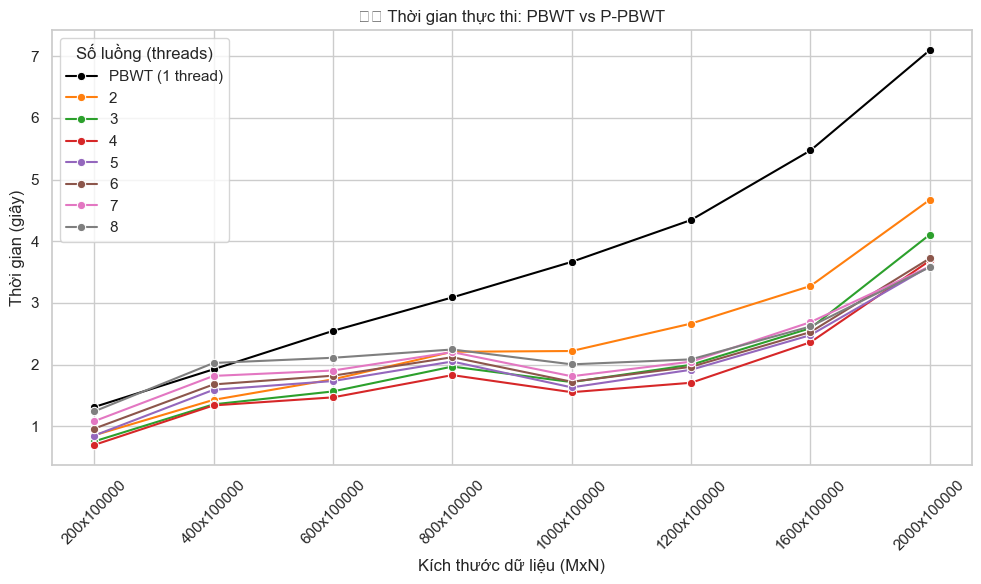

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# PBWT: 1 d√≤ng duy nh·∫•t
sns.lineplot(
    data=pbwt_df_summary,
    x='data_size',
    y='runtime_seconds',
    label='PBWT (1 thread)',
    marker='o',
    color='black'
)

# P-PBWT: nhi·ªÅu d√≤ng theo s·ªë lu·ªìng
custom_palette = {
    1: "#1f77b4",   # xanh d∆∞∆°ng
    2: "#ff7f0e",   # cam
    3: "#2ca02c",   # xanh l√°
    4: "#d62728",   # ƒë·ªè
    5: "#9467bd",  # t√≠m
    6: "#8c564b",  # n√¢u
    7: "#e377c2",  # h·ªìng
    8: "#7f7f7f",  # x√°m
}

sns.lineplot(
    data=p_pbwt_df_summary,
    x='data_size',
    y='runtime_seconds',
    hue='threads',
    palette=custom_palette,
    marker='o'
)


plt.title("‚è±Ô∏è Th·ªùi gian th·ª±c thi: PBWT vs P-PBWT")
plt.ylabel("Th·ªùi gian (gi√¢y)")
plt.xlabel("K√≠ch th∆∞·ªõc d·ªØ li·ªáu (MxN)")
plt.xticks(rotation=45)
plt.legend(title="S·ªë lu·ªìng (threads)")
plt.tight_layout()
plt.show()


/var/folders/cb/yq8wnxv527jg77rsc9x7twqc0000gp/T/ipykernel_6990/3450825397.py:39: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
/Users/NguyenLuan/.pyenv/versions/3.9.7/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


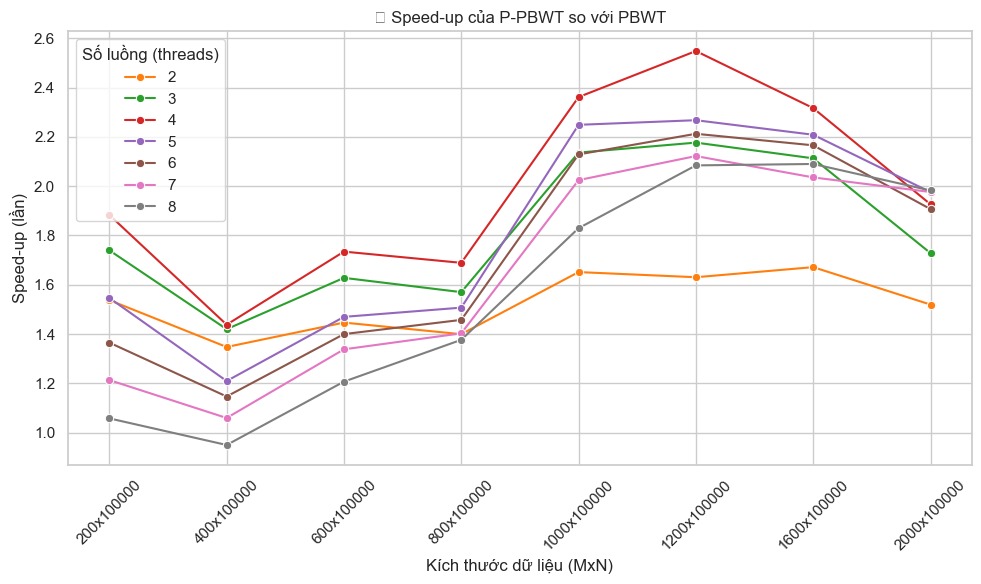

In [3]:
# T√≠nh speedup = th·ªùi gian PBWT / th·ªùi gian P-PBWT
base_times = pbwt_df_summary.set_index('data_size')['runtime_seconds']
df_speedup = p_pbwt_df_summary.copy()

# G·∫Øn th√™m c·ªôt pbwt_time t·ª´ map theo data_size
df_speedup['pbwt_time'] = df_speedup['data_size'].map(base_times)

# √âp ki·ªÉu ƒë·ªÉ tr√°nh l·ªói category khi chia
df_speedup['speedup'] = df_speedup['pbwt_time'].astype(float) / df_speedup['runtime_seconds'].astype(float)

# G√°n l·∫°i th·ª© t·ª± c·ªôt data_size
df_speedup['data_size'] = pd.Categorical(df_speedup['data_size'], categories=ordered_sizes, ordered=True)
custom_palette = {
    1: "#1f77b4",   # xanh d∆∞∆°ng
    2: "#ff7f0e",   # cam
    3: "#2ca02c",   # xanh l√°
    4: "#d62728",   # ƒë·ªè
    5: "#9467bd",  # t√≠m
    6: "#8c564b",  # n√¢u
    7: "#e377c2",  # h·ªìng
    8: "#7f7f7f",  # x√°m
}
# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_speedup,
    x='data_size',
    y='speedup',
    hue='threads',
    palette=custom_palette,
    marker='o'
)

plt.title("‚ö° Speed-up c·ªßa P-PBWT so v·ªõi PBWT")
plt.ylabel("Speed-up (l·∫ßn)")
plt.xlabel("K√≠ch th∆∞·ªõc d·ªØ li·ªáu (MxN)")
plt.xticks(rotation=45)
plt.legend(title="S·ªë lu·ªìng (threads)")
plt.tight_layout()
plt.show()


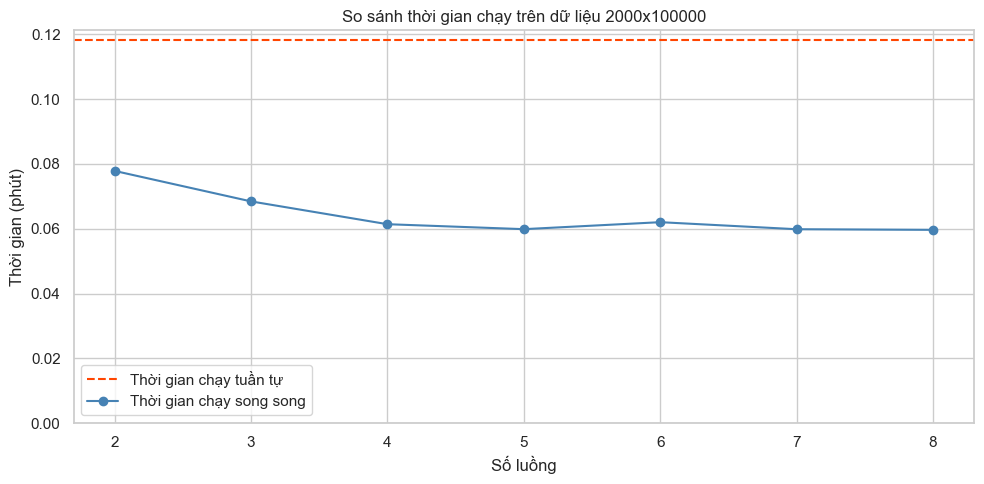

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ƒê·ªçc d·ªØ li·ªáu
csv_path = '/Users/NguyenLuan/pbwt-comparison/pbwt_vs_p_pbwt_results.csv'
df = pd.read_csv(csv_path)

# üìå Ch·ªçn d·ªØ li·ªáu c·ª• th·ªÉ mu·ªën v·∫Ω (thay ƒë·ªïi tu·ª≥ √Ω)
selected_data_size = "2000x100000"

# L·ªçc d·ªØ li·ªáu t∆∞∆°ng ·ª©ng
pbwt_point = df[(df['algorithm'] == 'pbwt') & (df['data_size'] == selected_data_size)].iloc[0]
p_pbwt_points = df[(df['algorithm'] == 'p_pbwt') & (df['data_size'] == selected_data_size)].sort_values(by='threads')

# T·∫°o bi·ªÉu ƒë·ªì
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

# V·∫Ω ƒë∆∞·ªùng PBWT c·ªë ƒë·ªãnh (m·ªôt gi√° tr·ªã duy nh·∫•t)
plt.axhline(y=pbwt_point['runtime_seconds'] / 60, color='orangered', linestyle='--', label='Th·ªùi gian ch·∫°y tu·∫ßn t·ª±')

# V·∫Ω ƒë∆∞·ªùng P-PBWT theo s·ªë lu·ªìng
plt.plot(p_pbwt_points['threads'], p_pbwt_points['runtime_seconds'] / 60,
         marker='o', label='Th·ªùi gian ch·∫°y song song', color='steelblue')

# C·∫•u h√¨nh bi·ªÉu ƒë·ªì
plt.title(f"So s√°nh th·ªùi gian ch·∫°y tr√™n d·ªØ li·ªáu {selected_data_size}")
plt.xlabel("S·ªë lu·ªìng")
plt.ylabel("Th·ªùi gian (ph√∫t)")
plt.ylim(bottom=0)
plt.legend()
plt.tight_layout()
plt.show()
